In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

Distance 4: We can use the Jaccard similarity and then calculate the distance with 1-similarity.

In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


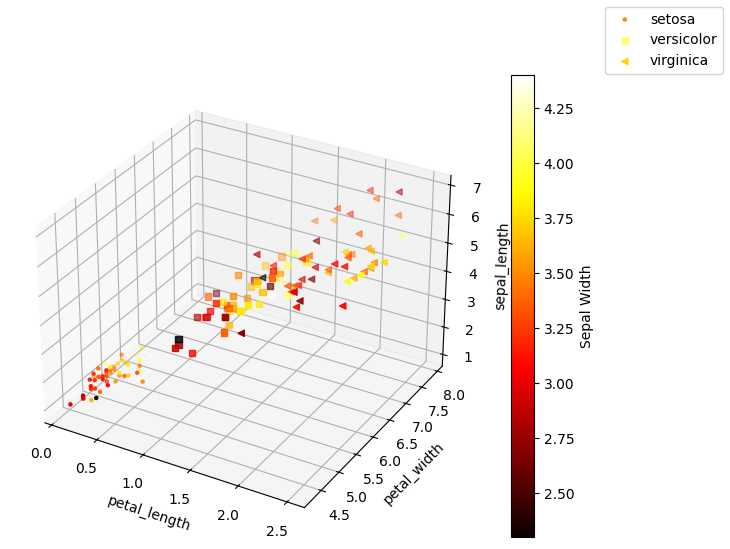

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z1 =iris.loc[iris['species'] == 'setosa']['petal_length']
x1 =iris.loc[iris['species'] == 'setosa']['petal_width']
y1 =iris.loc[iris['species'] == 'setosa']['sepal_length']
c1 =iris.loc[iris['species'] == 'setosa']['sepal_width']

z2 =iris.loc[iris['species'] == 'versicolor']['petal_length']
x2 =iris.loc[iris['species'] == 'versicolor']['petal_width']
y2 =iris.loc[iris['species'] == 'versicolor']['sepal_length']
c2 =iris.loc[iris['species'] == 'versicolor']['sepal_width']

z3 =iris.loc[iris['species'] == 'virginica']['petal_length']
x3 =iris.loc[iris['species'] == 'virginica']['petal_width']
y3 =iris.loc[iris['species'] == 'virginica']['sepal_length']
c3 =iris.loc[iris['species'] == 'virginica']['sepal_width']


img = ax.scatter(x1, y1, z1, c=c1, cmap=plt.hot(),marker = '.',label = 'setosa')
ax.scatter(x2, y2, z2, c=c2, cmap=plt.hot(),marker = 's',label = 'versicolor')
ax.scatter(x3, y3, z3, c=c3, cmap=plt.hot(),marker = '<',label = 'virginica')

colorbar = fig.colorbar(img)
colorbar.set_label('Sepal Width')


ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

fig.legend()

fig.set_size_inches(10,6)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


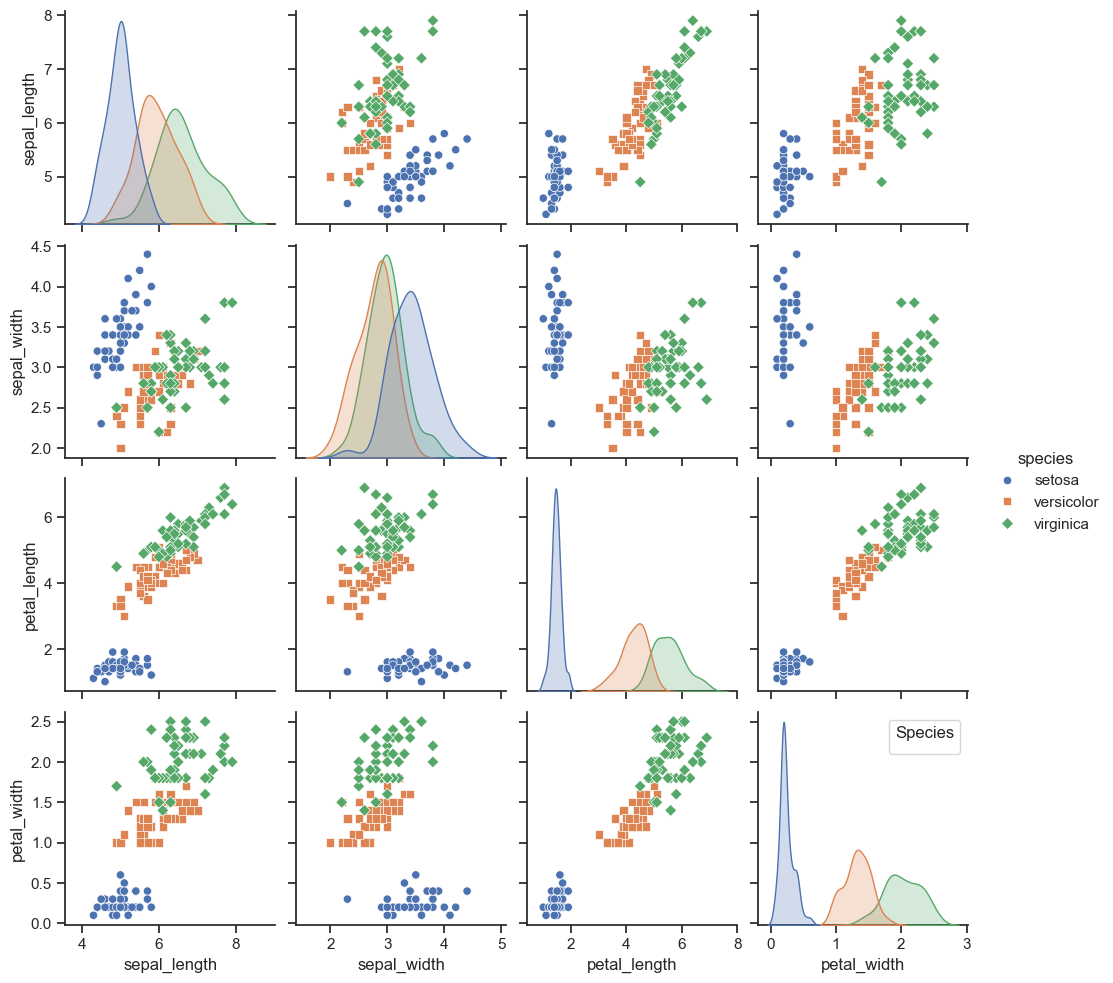

In [6]:
sns.set(style="ticks")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

plt.legend(title="Species", loc="upper right")

plt.show()

In [19]:
def euc_dist(p1,p2):
    return distance.euclidean(p1,p2)

def mah_dist(p1,p2):
    data = iris.iloc[:,:4]
    cov=np.cov(data, rowvar=False)
    covInv = np.linalg.inv(cov)
    return distance.mahalanobis(p1,p2,covInv)

def mink_dist(p1,p2,p):
    return distance.minkowski(p1,p2,p)
    


p1 = iris.iloc[0,:4]
p2 = iris.iloc[1,:4]
p=3

euc = euc_dist(p1,p2)
mah = mah_dist(p1,p2)
mink = mink_dist(p1,p2,p)

print(f"Distances between points 0 and 1 of the iris dataset:\nEuclidean distance: {euc}\nMahalanobis distance: {mah}\nMinkowski distance with p = {p}: {mink}")

Distances between points 0 and 1 of the iris dataset:
Euclidean distance: 0.5385164807134502
Mahalanobis distance: 1.354457239896682
Minkowski distance with p = 3: 0.5104468722001463


- Euclidean Distance: The Euclidean distance is better suited for data where all the features have simaler importance. For problems where the dimensions are on similar scales, and you want to measure the straight-line distance between points in the Euclidean space.

- Mahalanobis Distance: The Mahalanobis distance is better suited when your data has different scales and correlations between variables. It is very useful when dealing with multivariate data where the variables are not independent or have different units of measurement.

- Minkowski distance: The Minkowski distance is usefull when you want to control the sensitivity to different dimensions, this can be done by adjusting the parameter "p."